# RNAPT Example

    This example redoes the RNAP example with the addition of the Torsional/Bending Modulation

## OxView does not currently support Parameter Files 

In [2]:
import models as m
import os

In [10]:
wdir = os.getcwd()

# We will start from our reconstructed RNA Polymerase generated with Modeller 
coord, mp = m.get_pdb_info(wdir + '/examples/RNAPT/RNAP_MOD.pdb', returntype='cm')

# We need our Bfactors from the original PDB file
bfacts = m.get_pdb_info(wdir + '/examples/RNAPT/RNAP.pdb', returntype='b')

# Have to Adjust B-factors to new sequence (see original RNAP Example)
aseq = m.read_seqfile(wdir+'/examples/RNAPT/rnap_adjseq.txt')

nbfacts = m.map_bfactors(aseq, bfacts, fillvalue=70)

coord = coord[:-10]
nbfacts = nbfacts[:-10]

INFO: Don't worry about Discontinuous chain warnings!


/home/jonah/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 25388
  warnings.warn(


INFO: N = 3244
INFO: Don't worry about Discontinuous chain warnings!


/home/jonah/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 25950.
  warnings.warn(


INFO: N = 3179


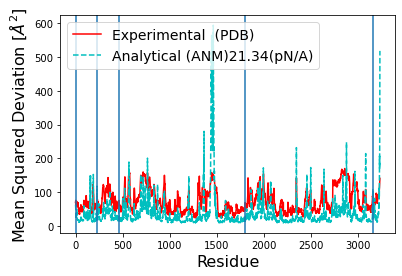

In [11]:
# Now we will make an ANMT model using the coordinates and bfactors
rnapt = m.ANMT(coord, nbfacts, T=300, cutoff=13)
rnapt.calc_ANM_unitary(cuda=False)
rnapt.anm_compare_bfactors_jupyter(bmap=mp)

In [ ]:
# Let's Export Our Model
m.export_to_simulation(rnapt, 'RNAP_MOD.pdb', upstreamdir='/examples/RNAPT/')